In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
from sklearn import metrics

In [2]:
current_working_directory = os.getcwd()
lab_directory = os.path.dirname(current_working_directory)
paper_dir = os.path.join(lab_directory, "paper")
folder_figures = os.path.join(paper_dir,"plots")
folder_tables = os.path.join(paper_dir,"tabelas")


data_folder = os.path.join(lab_directory, "data")



path_file = os.path.join(data_folder, "raw","Secondary.xlsx")

data = pd.read_excel(path_file)

In [8]:
data_for_table = data[["BANDA_SUBIR", "BANDA_DESCER", "Consumo real", "Consumo Máximo ENTSO-E"]].iloc[:1].T
data_for_table.index.names = ["Variável"]

In [9]:
data_for_table["Unidades"] = ["MW", "MW", "MW","MW"]
data_for_table["Variável"] = data_for_table.index
data_for_table=data_for_table[["Variável", "Unidades"]]

In [11]:
data_for_table.to_latex("tabela_dados_estudo_1_variaveis.tex", escape=False, index=False, 
                               float_format="%.2f")

In [12]:
data["year"] = data["DATA"].dt.year
data["month"] = data["DATA"].dt.month
data["day"] = data["DATA"].dt.day
data["day_of_year"] = data["DATA"].dt.day_of_year

In [13]:
data

,DATA,HORA,BANDA_SUBIR,BANDA_DESCER,Consumo real,Consumo Máximo ENTSO-E,Consumo máximo Portugal= ENTSOE/p(hora),year,month,day,day_of_year
0,2010-01-01,1,190.0,95.0,5953.826,9310.000,NaN,2010,1,1,1
1,2010-01-01,2,185.0,92.0,5419.243,8972.500,NaN,2010,1,1,1
2,2010-01-01,3,178.0,89.0,5051.821,8508.400,NaN,2010,1,1,1
3,2010-01-01,4,112.0,56.0,4838.914,4614.400,NaN,2010,1,1,1
4,2010-01-01,5,107.0,54.0,4712.141,4354.900,NaN,2010,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
78883,2018-12-31,20,184.5,92.3,6382.619,8939.025,NaN,2018,12,31,365
78884,2018-12-31,21,182.5,91.3,6396.562,8805.625,NaN,2018,12,31,365
78885,2018-12-31,22,172.5,86.3,6316.375,8150.625,NaN,2018,12,31,365
78886,2018-12-31,23,160.5,80.3,6400.275,7391.025,NaN,2018,12,31,365


In [14]:
# Tratamento inicial dos dados
## Retirar horas 25
horas_25 = data[ data['HORA'] == 25 ].index
data.drop(horas_25, inplace=True)

<Axes: >

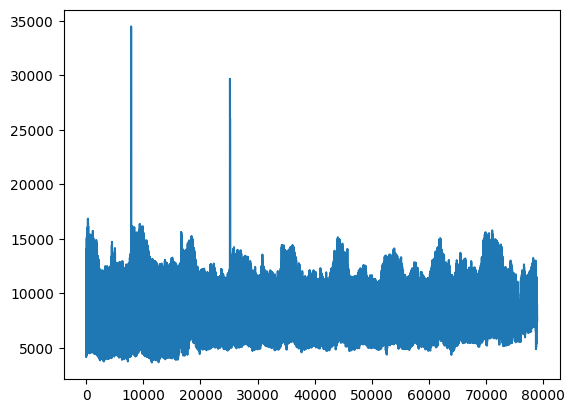

In [15]:
data["Consumo Máximo ENTSO-E"].plot()

<Axes: >

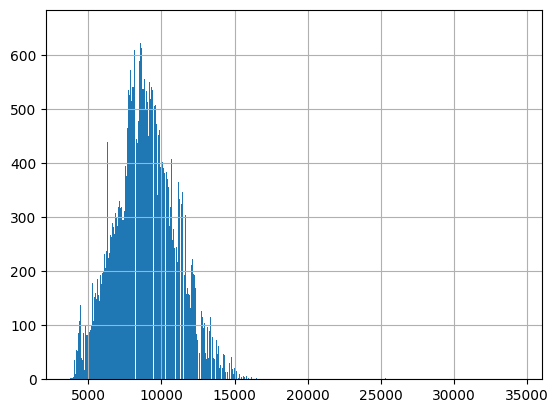

In [16]:
data["Consumo Máximo ENTSO-E"].hist(bins=1000)

<Axes: xlabel='Consumo Máximo ENTSO-E'>

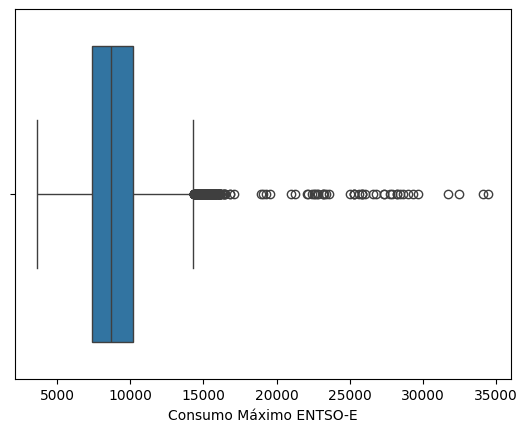

In [17]:
# Detectar outlier

sns.boxplot(x=data["Consumo Máximo ENTSO-E"])

In [18]:
# Bastantes outliers acima de cerca de 15k MWh
Q3 = data["Consumo Máximo ENTSO-E"].quantile(0.75)
Q1 = data["Consumo Máximo ENTSO-E"].quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + (1.5*IQR)

In [19]:
upper_limit

14352.525000000001

In [20]:
# Retirar outliers

data = data[data["Consumo Máximo ENTSO-E"]<upper_limit]

<Axes: >

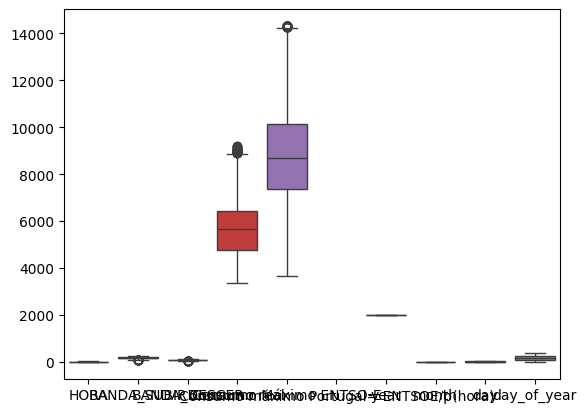

In [21]:
sns.boxplot(data=data)


<Axes: xlabel='Consumo Máximo ENTSO-E'>

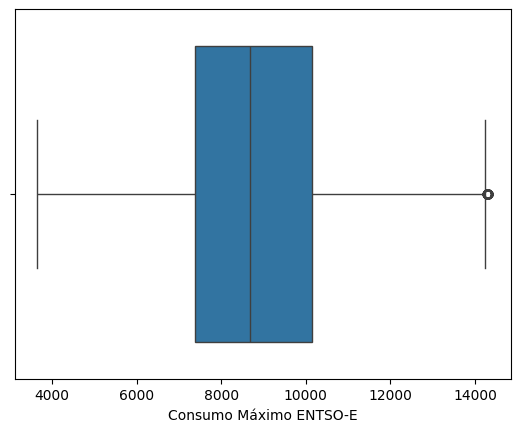

In [22]:
sns.boxplot(x=data["Consumo Máximo ENTSO-E"])


In [23]:
#1) Tirar o ENTSO-E com os parametros daquela tese
#2) Tirar erro
#3) definir p (beta)

In [24]:
parametro_p_delia = {1.6:[1,2,8,9,24],
                    1.4:[3,7,10,11,19,20],
                    1.3:[4],
                    1.2:[5,6,12,13,14,15,16,17,18,22,23,21]}

map_p_delia = {}
for key in parametro_p_delia:
    for hora in parametro_p_delia[key]:
        map_p_delia[hora]=key

In [25]:
map_p_delia

{1: 1.6,
 2: 1.6,
 8: 1.6,
 9: 1.6,
 24: 1.6,
 3: 1.4,
 7: 1.4,
 10: 1.4,
 11: 1.4,
 19: 1.4,
 20: 1.4,
 4: 1.3,
 5: 1.2,
 6: 1.2,
 12: 1.2,
 13: 1.2,
 14: 1.2,
 15: 1.2,
 16: 1.2,
 17: 1.2,
 18: 1.2,
 22: 1.2,
 23: 1.2,
 21: 1.2}

In [26]:
nome_tese_celia = "Carneiro2016"
nome_tese_joao = "Curent study"
nome_tese_joao_norm = f"{nome_tese_joao} norm."
nome_tese_joao_banda = f"{nome_tese_joao} Banda Subir"
nome_tese_celia_banda = f"{nome_tese_celia} Banda Subir"
nome_tese_celia_erro_percentual = f"{nome_tese_celia} erro percentual"
nome_tese_joao_erro_percentual = f"{nome_tese_joao} erro percentual"

In [27]:
data[nome_tese_celia] = data["HORA"].map(map_p_delia)

/tmp/ipykernel_11633/834885806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[nome_tese_celia] = data["HORA"].map(map_p_delia)


In [28]:
data.columns

Index(['DATA', 'HORA', 'BANDA_SUBIR', 'BANDA_DESCER', 'Consumo real',
       'Consumo Máximo ENTSO-E', 'Consumo máximo Portugal= ENTSOE/p(hora)',
       'year', 'month', 'day', 'day_of_year', 'Carneiro2016'],
      dtype='object')

In [29]:
np.all(data[nome_tese_celia]==data["HORA"].map(map_p_delia))

True

In [30]:
data

,DATA,HORA,BANDA_SUBIR,BANDA_DESCER,Consumo real,Consumo Máximo ENTSO-E,Consumo máximo Portugal= ENTSOE/p(hora),year,month,day,day_of_year,Carneiro2016
0,2010-01-01,1,190.0,95.0,5953.826,9310.000,NaN,2010,1,1,1,1.6
1,2010-01-01,2,185.0,92.0,5419.243,8972.500,NaN,2010,1,1,1,1.6
2,2010-01-01,3,178.0,89.0,5051.821,8508.400,NaN,2010,1,1,1,1.4
3,2010-01-01,4,112.0,56.0,4838.914,4614.400,NaN,2010,1,1,1,1.3
4,2010-01-01,5,107.0,54.0,4712.141,4354.900,NaN,2010,1,1,1,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...
78883,2018-12-31,20,184.5,92.3,6382.619,8939.025,NaN,2018,12,31,365,1.4
78884,2018-12-31,21,182.5,91.3,6396.562,8805.625,NaN,2018,12,31,365,1.2
78885,2018-12-31,22,172.5,86.3,6316.375,8150.625,NaN,2018,12,31,365,1.2
78886,2018-12-31,23,160.5,80.3,6400.275,7391.025,NaN,2018,12,31,365,1.2


In [31]:
data["BANDA_RESERVA"] =(data["BANDA_SUBIR"]+data["BANDA_DESCER"])

/tmp/ipykernel_11633/30770636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["BANDA_RESERVA"] =(data["BANDA_SUBIR"]+data["BANDA_DESCER"])


In [32]:
data

,DATA,HORA,BANDA_SUBIR,BANDA_DESCER,Consumo real,Consumo Máximo ENTSO-E,Consumo máximo Portugal= ENTSOE/p(hora),year,month,day,day_of_year,Carneiro2016,BANDA_RESERVA
0,2010-01-01,1,190.0,95.0,5953.826,9310.000,NaN,2010,1,1,1,1.6,285.0
1,2010-01-01,2,185.0,92.0,5419.243,8972.500,NaN,2010,1,1,1,1.6,277.0
2,2010-01-01,3,178.0,89.0,5051.821,8508.400,NaN,2010,1,1,1,1.4,267.0
3,2010-01-01,4,112.0,56.0,4838.914,4614.400,NaN,2010,1,1,1,1.3,168.0
4,2010-01-01,5,107.0,54.0,4712.141,4354.900,NaN,2010,1,1,1,1.2,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78883,2018-12-31,20,184.5,92.3,6382.619,8939.025,NaN,2018,12,31,365,1.4,276.8
78884,2018-12-31,21,182.5,91.3,6396.562,8805.625,NaN,2018,12,31,365,1.2,273.8
78885,2018-12-31,22,172.5,86.3,6316.375,8150.625,NaN,2018,12,31,365,1.2,258.8
78886,2018-12-31,23,160.5,80.3,6400.275,7391.025,NaN,2018,12,31,365,1.2,240.8


In [33]:
# Consumo Máximo ENTSO-E é a formula da ENTDO-E aplicando a Banda a Subir 

# ( Aquela formula sem o beta ou p)

In [34]:
# ENTSO-E :
# BRS - Banda de regulaçao secundaria
# BRSsubir = p x sqrt(a x Lmax + b²) - b 

# Lmáx o valor máximo do consumo previsto para a hora em causa.
#a e b, estabelecidos empiricamente, são, respetivamente, 10 e 150 MW
a = 10
b = 150

#p = (Banda_Subir + b) / sqrt(a * Lmax + b²)
data[nome_tese_joao] = (data["BANDA_RESERVA"] + b) / np.sqrt((a*data["Consumo real"]) + (b*b) )
data["p_proposto_cru"] = (data["BANDA_RESERVA"] + b) / np.sqrt((a*data["Consumo real"]) + (b*b) )
data["p_proposto"] = (data["BANDA_RESERVA"] + b) / np.sqrt((a*data["Consumo real"]) + (b*b) )


data["BANDA_RESERVA_Carneiro2016"] =( data[nome_tese_celia] * np.sqrt((a*data["Consumo real"]) + (b*b) ) ) - b 


# A banda pode ter uma margem de 5%


/tmp/ipykernel_11633/4043367929.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[nome_tese_joao] = (data["BANDA_RESERVA"] + b) / np.sqrt((a*data["Consumo real"]) + (b*b) )
/tmp/ipykernel_11633/4043367929.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["p_proposto_cru"] = (data["BANDA_RESERVA"] + b) / np.sqrt((a*data["Consumo real"]) + (b*b) )
/tmp/ipykernel_11633/4043367929.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [35]:
data

,DATA,HORA,BANDA_SUBIR,BANDA_DESCER,Consumo real,Consumo Máximo ENTSO-E,Consumo máximo Portugal= ENTSOE/p(hora),year,month,day,day_of_year,Carneiro2016,BANDA_RESERVA,Curent study,p_proposto_cru,p_proposto,BANDA_RESERVA_Carneiro2016
0,2010-01-01,1,190.0,95.0,5953.826,9310.000,NaN,2010,1,1,1,1.6,285.0,1.518732,1.518732,1.518732,308.277149
1,2010-01-01,2,185.0,92.0,5419.243,8972.500,NaN,2010,1,1,1,1.6,277.0,1.541884,1.541884,1.541884,293.094370
2,2010-01-01,3,178.0,89.0,5051.821,8508.400,NaN,2010,1,1,1,1.4,267.0,1.543194,1.543194,1.543194,228.306346
3,2010-01-01,4,112.0,56.0,4838.914,4614.400,NaN,2010,1,1,1,1.3,168.0,1.194366,1.194366,1.194366,196.125189
4,2010-01-01,5,107.0,54.0,4712.141,4354.900,NaN,2010,1,1,1,1.2,161.0,1.178661,1.178661,1.178661,166.630432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78883,2018-12-31,20,184.5,92.3,6382.619,8939.025,NaN,2018,12,31,365,1.4,276.8,1.452624,1.452624,1.452624,261.338465
78884,2018-12-31,21,182.5,91.3,6396.562,8805.625,NaN,2018,12,31,365,1.2,273.8,1.441250,1.441250,1.441250,202.860444
78885,2018-12-31,22,172.5,86.3,6316.375,8150.625,NaN,2018,12,31,365,1.2,258.8,1.396730,1.396730,1.396730,201.220444
78886,2018-12-31,23,160.5,80.3,6400.275,7391.025,NaN,2018,12,31,365,1.2,240.8,1.328739,1.328739,1.328739,202.936198


In [36]:
# Normalizar o P

# media por horas
#


# Consumo atraves deste p
# Banda atraves do p


# uso a margem pois estou a usar o consumo real em vez da previsao do dia anterior

## Verificar se esta dentrro da margem - Erro vai ser a diferenca entre o consumo real e este calculado

# Erro vai ser a diferenca entre o Banda real e este calculado


In [37]:
p_delia_bins = len(np.unique(data[nome_tese_celia]))
p_calculado_bins = len(np.unique(data["p_proposto"].round(1)))

<Axes: >

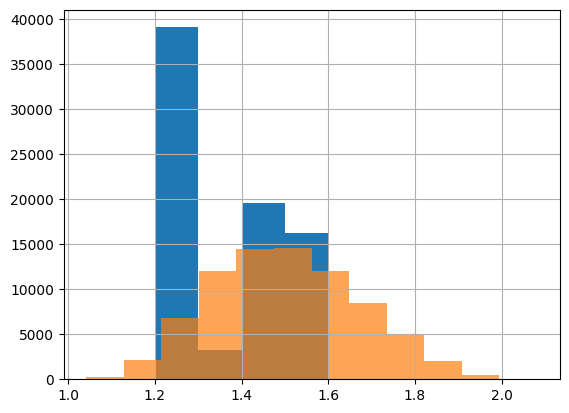

In [38]:
data[nome_tese_celia].hist(bins=p_delia_bins)
data["p_proposto"].hist(bins=p_calculado_bins, alpha=0.7)

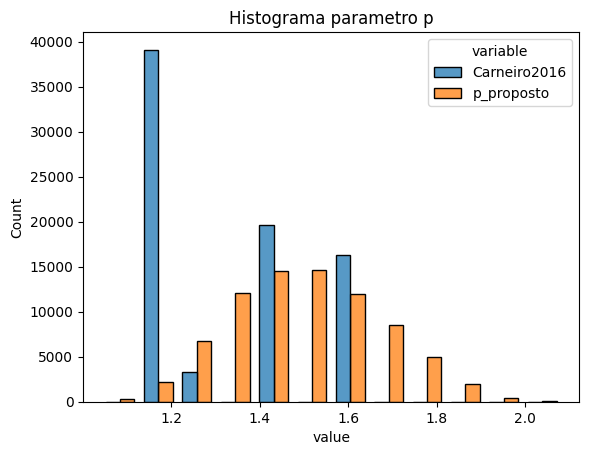

In [39]:
# plot melted dataframe in a single command
plot_name = 'Histograma parametro p'

sns_plot = sns.histplot(data[[nome_tese_celia, "p_proposto"]].melt(), x='value', hue='variable',
             multiple='dodge', shrink=.75, bins=p_calculado_bins)
sns_plot.set(title=plot_name)

figure_name_path = os.path.join(folder_figures, f"{"_".join(plot_name.lower().split(" "))}.png")
sns_plot.figure.savefig(figure_name_path)

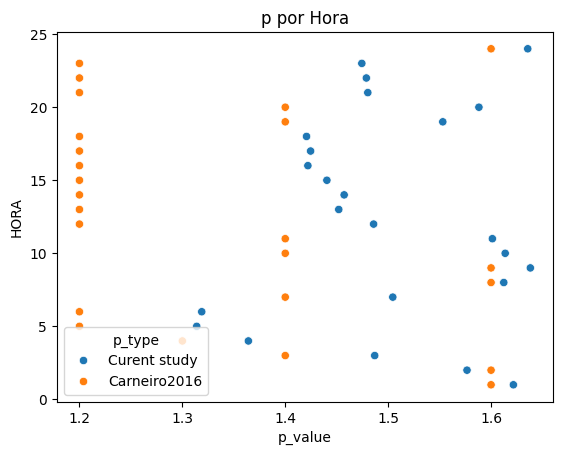

In [40]:
p_calc = data.groupby("HORA")[nome_tese_joao].median()


p_set2 = pd.DataFrame(p_calc.reset_index())
p_set2["p_value"] = p_set2["HORA"].map(map_p_delia)
p_set2["p_type"] = nome_tese_celia
p_set2.drop(nome_tese_joao,axis=1, inplace=True)

p_calc = data.groupby("HORA")[nome_tese_joao].median()

p_set = pd.DataFrame(p_calc.reset_index())
p_set["p_value"] = p_set[nome_tese_joao]
p_set.drop(nome_tese_joao,axis=1, inplace=True)
p_set["p_type"] = nome_tese_joao


p_set = pd.concat([p_set, p_set2])
p_set.reset_index(inplace=True)

plot_name = 'p por Hora'

sns_plot = sns.scatterplot(data=p_set, x="p_value", y="HORA", hue="p_type")
sns_plot.set(title=plot_name)


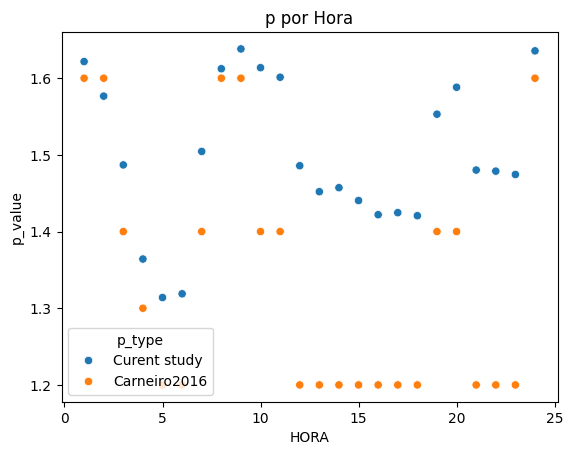

In [41]:
p_calc = data.groupby("HORA")[nome_tese_joao].median()


p_set2 = pd.DataFrame(p_calc.reset_index())
p_set2["p_value"] = p_set2["HORA"].map(map_p_delia)
p_set2["p_type"] = nome_tese_celia
p_set2.drop(nome_tese_joao,axis=1, inplace=True)

p_calc = data.groupby("HORA")[nome_tese_joao].median()

p_set = pd.DataFrame(p_calc.reset_index())
p_set["p_value"] = p_set[nome_tese_joao]
p_set.drop(nome_tese_joao,axis=1, inplace=True)
p_set["p_type"] = nome_tese_joao


p_set = pd.concat([p_set, p_set2])
p_set.reset_index(inplace=True)

plot_name = 'p por Hora'

sns_plot = sns.scatterplot(data=p_set, y="p_value", x="HORA", hue="p_type")
sns_plot.set(title=plot_name)


In [42]:
data[["HORA", "Carneiro2016", "p_proposto"]]

,HORA,Carneiro2016,p_proposto
0,1,1.6,1.518732
1,2,1.6,1.541884
2,3,1.4,1.543194
3,4,1.3,1.194366
4,5,1.2,1.178661
...,...,...,...
78883,20,1.4,1.452624
78884,21,1.2,1.441250
78885,22,1.2,1.396730
78886,23,1.2,1.328739


/tmp/ipykernel_11633/2651053510.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


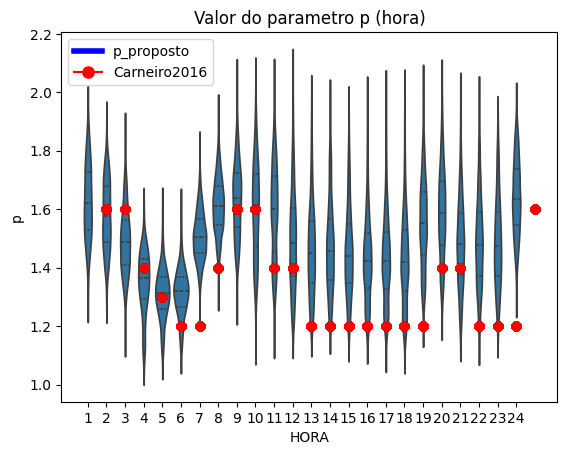

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# data = pd.DataFrame({"HORA": [...], "Carneiro2016": [...], "p_proposto": [...]})

# Set the style of the visualization
#sns.set(style="whitegrid")

# Create a figure and axis object
fig, ax = plt.subplots()

# Create the violin plot
sns.violinplot(x="HORA", y="p_proposto", data=data, inner='quartile', #palette="Set3", 
               ax=ax)

# Overlay the scatter plot
ax.scatter(data['HORA'], data['Carneiro2016'], color='red')

# Customize the appearance of the plot
plot_name = "Valor do parametro p (hora)"
plt.title(plot_name)
plt.xlabel('HORA')
plt.ylabel('p')
plt.legend()
legend_elements = [
    plt.Line2D([0], [0], color='blue', lw=4, label='p_proposto'),
    plt.Line2D([0], [0], marker='o', color='red', label='Carneiro2016', markersize=8)
]
ax.legend(handles=legend_elements)
# Show the plot
plt.show()
figure_name_path = os.path.join(folder_figures, f"{"_".join(plot_name.lower().split(" "))}.png")
fig.savefig(figure_name_path)


In [44]:
median_data = data[["HORA", "Carneiro2016", "p_proposto"]].groupby("HORA").median()
mean_data = data[["HORA", "Carneiro2016", "p_proposto"]].groupby("HORA").mean()

In [45]:
data["p_proposto_media"]=data["HORA"].map(mean_data.to_dict()["p_proposto"])
data["p_proposto_mediana"]=data["HORA"].map(median_data.to_dict()["p_proposto"])

/tmp/ipykernel_11633/976950091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["p_proposto_media"]=data["HORA"].map(mean_data.to_dict()["p_proposto"])
/tmp/ipykernel_11633/976950091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["p_proposto_mediana"]=data["HORA"].map(median_data.to_dict()["p_proposto"])


In [46]:
data[["HORA", "Carneiro2016", "p_proposto", "p_proposto_media","p_proposto_mediana"]]

,HORA,Carneiro2016,p_proposto,p_proposto_media,p_proposto_mediana
0,1,1.6,1.518732,1.627352,1.621694
1,2,1.6,1.541884,1.580080,1.576623
2,3,1.4,1.543194,1.492195,1.486929
3,4,1.3,1.194366,1.352257,1.364176
4,5,1.2,1.178661,1.311568,1.313958
...,...,...,...,...,...
78883,20,1.4,1.452624,1.588898,1.588201
78884,21,1.2,1.441250,1.485916,1.480219
78885,22,1.2,1.396730,1.488101,1.478815
78886,23,1.2,1.328739,1.487890,1.474412


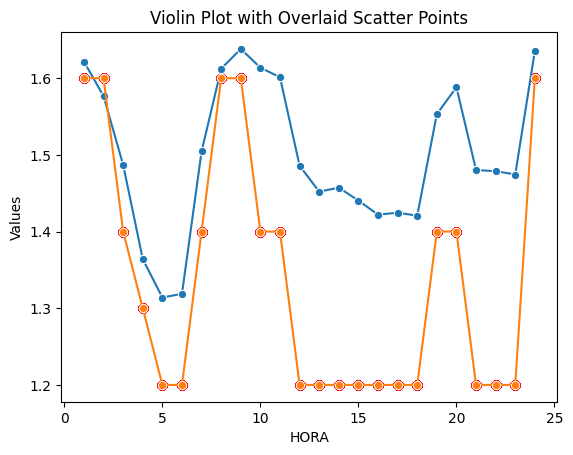

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# data = pd.DataFrame({"HORA": [...], "Carneiro2016": [...], "p_proposto": [...]})

# Set the style of the visualization
#sns.set(style="whitegrid")

# Create a figure and axis object
fig, ax = plt.subplots()

# Create the violin plot
sns.lineplot(x="HORA", y="p_proposto", data=median_data,  ax=ax,  marker='o')
sns.lineplot(x="HORA", y="Carneiro2016", data=median_data,  ax=ax,  marker='o')

# Overlay the scatter plot
ax.scatter(data['HORA'], data['Carneiro2016'], color='red')

# Customize the appearance of the plot
plt.title('Violin Plot with Overlaid Scatter Points')
plt.xlabel('HORA')
plt.ylabel('Values')
# Show the plot
plt.show()


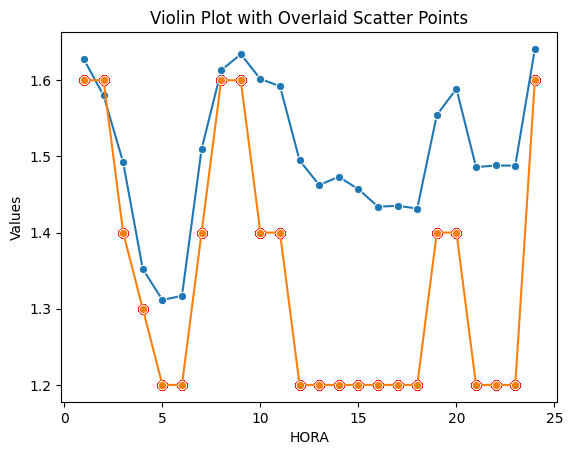

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# data = pd.DataFrame({"HORA": [...], "Carneiro2016": [...], "p_proposto": [...]})

# Set the style of the visualization
#sns.set(style="whitegrid")

# Create a figure and axis object
fig, ax = plt.subplots()

# Create the violin plot
sns.lineplot(x="HORA", y="p_proposto", data=mean_data,  ax=ax,  marker='o')
sns.lineplot(x="HORA", y="Carneiro2016", data=mean_data,  ax=ax,  marker='o')

# Overlay the scatter plot
ax.scatter(data['HORA'], data['Carneiro2016'], color='red')

# Customize the appearance of the plot
plt.title('Violin Plot with Overlaid Scatter Points')
plt.xlabel('HORA')
plt.ylabel('Values')
# Show the plot
plt.show()


/tmp/ipykernel_11633/1805858058.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="HORA", y="BANDA_RESERVA", data=data, inner='quartile', palette="Set3", ax=ax)


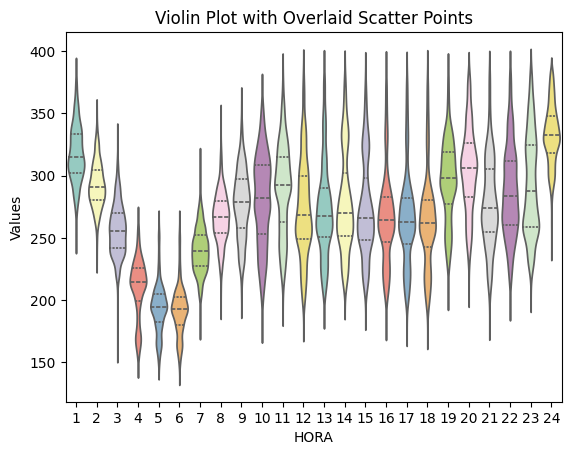

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# data = pd.DataFrame({"HORA": [...], "Carneiro2016": [...], "p_proposto": [...]})

# Set the style of the visualization
#sns.set(style="whitegrid")

# Create a figure and axis object
fig, ax = plt.subplots()

# Create the violin plot
sns.violinplot(x="HORA", y="BANDA_RESERVA", data=data, inner='quartile', palette="Set3", ax=ax)

# Overlay the scatter plot
#ax.scatter(data['HORA'], data['Carneiro2016'], color='red')

# Customize the appearance of the plot
plt.title('Violin Plot with Overlaid Scatter Points')
plt.xlabel('HORA')
plt.ylabel('Values')
# Show the plot
plt.show()


/tmp/ipykernel_11633/2827473558.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="HORA", y="Consumo real", data=data, inner='quartile', palette="Set3", ax=ax)


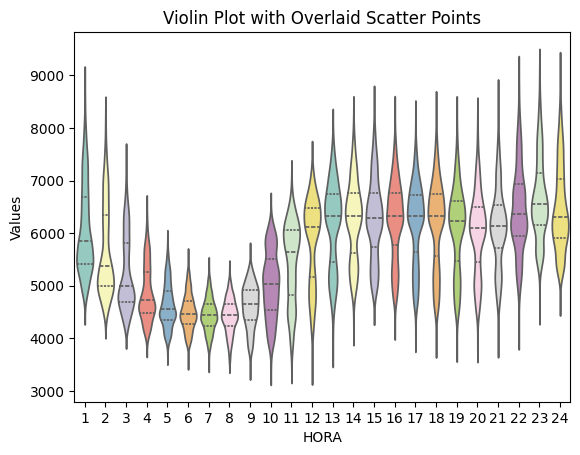

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# data = pd.DataFrame({"HORA": [...], "Carneiro2016": [...], "p_proposto": [...]})

# Set the style of the visualization
#sns.set(style="whitegrid")

# Create a figure and axis object
fig, ax = plt.subplots()

# Create the violin plot
sns.violinplot(x="HORA", y="Consumo real", data=data, inner='quartile', palette="Set3", ax=ax)

# Overlay the scatter plot
#ax.scatter(data['HORA'], data['Carneiro2016'], color='red')

# Customize the appearance of the plot
plt.title('Violin Plot with Overlaid Scatter Points')
plt.xlabel('HORA')
plt.ylabel('Values')
# Show the plot
plt.show()


In [51]:
def weighted_group_average(df, group_col =  "HORA",
        value_col = nome_tese_joao,
            weights_col = "BANDA_SUBIR"):

    return round(df.groupby(group_col).apply(lambda x: (x[value_col] * x[weights_col]).sum() / x[weights_col].sum()), 1)

In [52]:
weighted_band_mean = weighted_group_average(data, value_col="p_proposto", weights_col="BANDA_RESERVA")
weighted_consumo_mean = weighted_group_average(data, value_col="p_proposto", weights_col="Consumo real")
weighted_band_subir_mean = weighted_group_average(data, value_col="p_proposto", weights_col="BANDA_SUBIR")
weighted_band_descer_mean = weighted_group_average(data, value_col="p_proposto", weights_col="BANDA_DESCER")


data["p_proposto_media_ponderada_banda"]=data["HORA"].map(weighted_band_mean.to_dict())
data["p_proposto_media_ponderada_consumo"]=data["HORA"].map(weighted_consumo_mean.to_dict())
data["p_proposto_media_ponderada_banda_subir"]=data["HORA"].map(weighted_band_subir_mean.to_dict())
data["p_proposto_media_ponderada_banda_descer"]=data["HORA"].map(weighted_band_descer_mean.to_dict())


/tmp/ipykernel_11633/2472613780.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return round(df.groupby(group_col).apply(lambda x: (x[value_col] * x[weights_col]).sum() / x[weights_col].sum()), 1)
/tmp/ipykernel_11633/2472613780.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return round(df.groupby(group_col).apply(lambda x: (x[value_col] * x[weights_col]).sum() / x[weights_col].sum()), 1)
/tmp/ipy

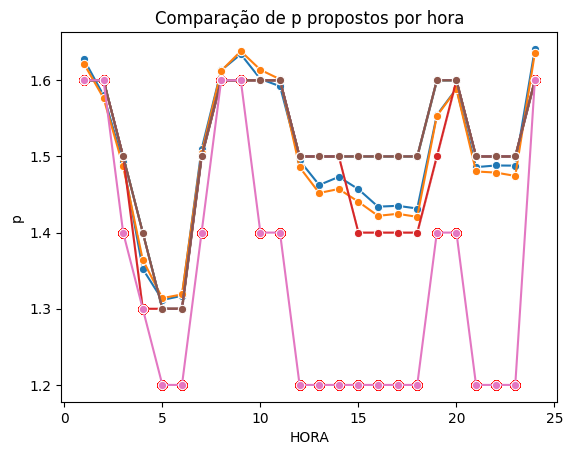

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# data = pd.DataFrame({"HORA": [...], "Carneiro2016": [...], "p_proposto": [...]})

# Set the style of the visualization
#sns.set(style="whitegrid")

# Create a figure and axis object
fig, ax = plt.subplots()

# Create the violin plot
sns.lineplot(x="HORA", y="p_proposto", data=mean_data,  ax=ax,  marker='o')
sns.lineplot(x="HORA", y="p_proposto", data=median_data,  ax=ax,  marker='o')
sns.lineplot(x="HORA", y="p_proposto_media_ponderada_banda", data=data,  ax=ax,  marker='o')
sns.lineplot(x="HORA", y="p_proposto_media_ponderada_consumo", data=data,  ax=ax,  marker='o')
sns.lineplot(x="HORA", y="p_proposto_media_ponderada_banda_subir", data=data,  ax=ax,  marker='o')
sns.lineplot(x="HORA", y="p_proposto_media_ponderada_banda_descer", data=data,  ax=ax,  marker='o')

sns.lineplot(x="HORA", y="Carneiro2016", data=mean_data,  ax=ax,  marker='o')

# Overlay the scatter plot
ax.scatter(data['HORA'], data['Carneiro2016'], color='red')

# Customize the appearance of the plot
plt.title('Comparação de p propostos por hora')
plt.xlabel('HORA')
plt.ylabel('p')

# Show the plot
plt.show()


/tmp/ipykernel_11633/4267507017.py:33: UserWarning: Legend does not support handles for Axes instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax.legend(lines, labels, loc='best')


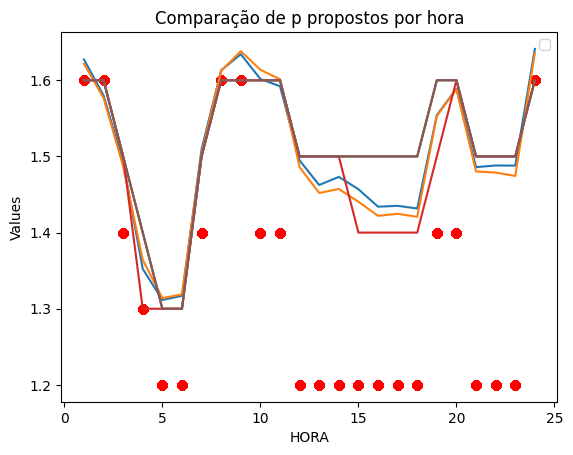

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data', 'mean_data', 'median_data' are your DataFrames
# data = pd.DataFrame({"HORA": [...], "Carneiro2016": [...], "p_proposto": [...]})
# mean_data = ...
# median_data = ...

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot lines for different datasets
lines = []
labels = []
grouped_data = data.groupby("HORA")
for i, column in enumerate(["p_proposto_media","p_proposto_mediana", 'p_proposto_media_ponderada_banda', 'p_proposto_media_ponderada_consumo', 'p_proposto_media_ponderada_banda_subir', 'p_proposto_media_ponderada_banda_descer']):
    lines.append(grouped_data[column].mean().plot(label=f'{column}'))

    #lines.append(ax.plot(data['HORA'], data[column], label=f'{column}')[0])
    labels.append(f'{column}')

# Add scatter plot
ax.scatter(data['HORA'], data['Carneiro2016'], color='red', label='Carneiro2016')

# Customize the appearance of the plot
plt.title('Comparação de p propostos por hora')
plt.xlabel('HORA')
plt.ylabel('Values')

# Remove grid

# Add legend
ax.legend(lines, labels, loc='best')

# Show the plot
plt.show()


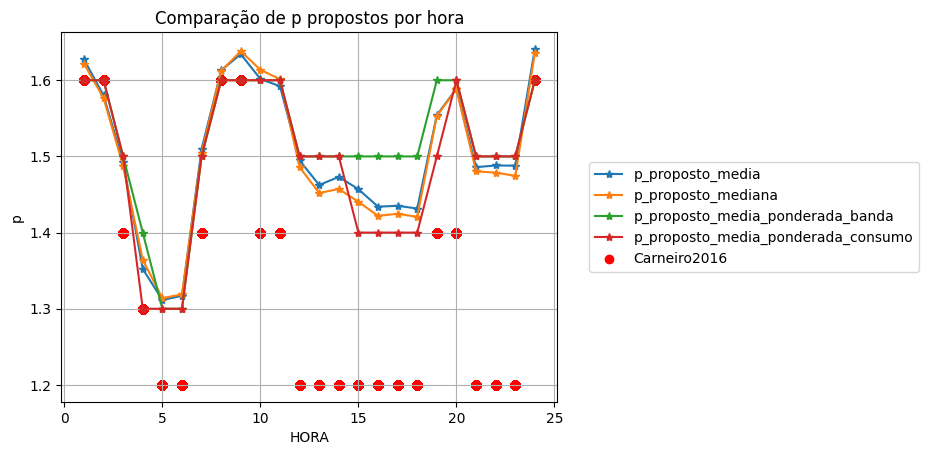

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data', 'mean_data', 'median_data' are your DataFrames
# data = pd.DataFrame({"HORA": [...], "Carneiro2016": [...], "p_proposto": [...]})
# mean_data = ...
# median_data = ...

# Group data by "HORA" and calculate the required aggregations
aggregated_data = data.groupby("HORA").agg({
    "p_proposto_media": "mean",
    "p_proposto_mediana": "median",
    "p_proposto_media_ponderada_banda": "mean",
    "p_proposto_media_ponderada_consumo": "mean",
    "p_proposto_media_ponderada_banda_subir": "mean",
    "p_proposto_media_ponderada_banda_descer": "mean"
}).reset_index()

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot lines for different datasets
for column in ["p_proposto_media", "p_proposto_mediana", "p_proposto_media_ponderada_banda", "p_proposto_media_ponderada_consumo", 
              # "p_proposto_media_ponderada_banda_subir", "p_proposto_media_ponderada_banda_descer"
              ]:
    ax.plot(aggregated_data['HORA'], aggregated_data[column], label=f'{column}', marker="*")

# Add scatter plot
ax.scatter(data['HORA'], data['Carneiro2016'], color='red', label='Carneiro2016')

# Customize the appearance of the plot
plot_name="Comparação de p propostos por hora"
plt.title(plot_name)
plt.xlabel('HORA')
plt.ylabel('p')

plt.grid()
# Add legend
ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
# Show the plot
plt.show()

figure_name_path = os.path.join(folder_figures, f"{"_".join(plot_name.lower().split(" "))}.png")
fig.savefig(figure_name_path, bbox_inches='tight')


In [58]:

ps_to_use=[
    "p_proposto_media",
    "p_proposto_mediana",
    "p_proposto_media_ponderada_banda",
    "p_proposto_media_ponderada_consumo",
    "p_proposto_media_ponderada_banda_subir",
    "p_proposto_media_ponderada_banda_descer",
    #*new_cols
]

for p_to_use in ps_to_use:
    name_banda_reserva = f"BANDA_RESERVA_{p_to_use}"
    name_banda_reserva_subir = f"BANDA_SUBIR_{p_to_use}"
    name_banda_reserva_descer = f"BANDA_DESCER_{p_to_use}"

    data[name_banda_reserva] =( data[p_to_use] * np.sqrt((a*data["Consumo real"]) + (b*b) ) ) - b
    data[name_banda_reserva_subir] =data[name_banda_reserva]*(2/3)
    data[name_banda_reserva_descer] =data[name_banda_reserva]*(1/3)


/tmp/ipykernel_11633/2741649641.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name_banda_reserva] =( data[p_to_use] * np.sqrt((a*data["Consumo real"]) + (b*b) ) ) - b
/tmp/ipykernel_11633/2741649641.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name_banda_reserva_subir] =data[name_banda_reserva]*(2/3)
/tmp/ipykernel_11633/2741649641.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [59]:
p_to_use  ="Carneiro2016"
name_banda_reserva_subir = f"BANDA_SUBIR_{p_to_use}"
name_banda_reserva_descer = f"BANDA_DESCER_{p_to_use}"
data[name_banda_reserva_subir] =data[name_banda_reserva]*(2/3)
data[name_banda_reserva_descer] =data[name_banda_reserva]*(1/3)

/tmp/ipykernel_11633/2004148838.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name_banda_reserva_subir] =data[name_banda_reserva]*(2/3)
/tmp/ipykernel_11633/2004148838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name_banda_reserva_descer] =data[name_banda_reserva]*(1/3)


In [60]:
data

,DATA,HORA,BANDA_SUBIR,BANDA_DESCER,Consumo real,Consumo Máximo ENTSO-E,Consumo máximo Portugal= ENTSOE/p(hora),year,month,day,...,BANDA_SUBIR_p_proposto_media_ponderada_consumo,BANDA_DESCER_p_proposto_media_ponderada_consumo,BANDA_RESERVA_p_proposto_media_ponderada_banda_subir,BANDA_SUBIR_p_proposto_media_ponderada_banda_subir,BANDA_DESCER_p_proposto_media_ponderada_banda_subir,BANDA_RESERVA_p_proposto_media_ponderada_banda_descer,BANDA_SUBIR_p_proposto_media_ponderada_banda_descer,BANDA_DESCER_p_proposto_media_ponderada_banda_descer,BANDA_SUBIR_Carneiro2016,BANDA_DESCER_Carneiro2016
0,2010-01-01,1,190.0,95.0,5953.826,9310.000,NaN,2010,1,1,...,205.518100,102.759050,308.277149,205.518100,102.759050,308.277149,205.518100,102.759050,205.518100,102.759050
1,2010-01-01,2,185.0,92.0,5419.243,8972.500,NaN,2010,1,1,...,195.396247,97.698123,293.094370,195.396247,97.698123,293.094370,195.396247,97.698123,195.396247,97.698123
2,2010-01-01,3,178.0,89.0,5051.821,8508.400,NaN,2010,1,1,...,170.218819,85.109409,255.328228,170.218819,85.109409,255.328228,170.218819,85.109409,170.218819,85.109409
3,2010-01-01,4,112.0,56.0,4838.914,4614.400,NaN,2010,1,1,...,130.750126,65.375063,222.750204,148.500136,74.250068,222.750204,148.500136,74.250068,148.500136,74.250068
4,2010-01-01,5,107.0,54.0,4712.141,4354.900,NaN,2010,1,1,...,128.677534,64.338767,193.016301,128.677534,64.338767,193.016301,128.677534,64.338767,128.677534,64.338767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78883,2018-12-31,20,184.5,92.3,6382.619,8939.025,NaN,2018,12,31,...,213.400735,106.700367,320.101102,213.400735,106.700367,320.101102,213.400735,106.700367,213.400735,106.700367
78884,2018-12-31,21,182.5,91.3,6396.562,8805.625,NaN,2018,12,31,...,194.050370,97.025185,291.075555,194.050370,97.025185,291.075555,194.050370,97.025185,194.050370,97.025185
78885,2018-12-31,22,172.5,86.3,6316.375,8150.625,NaN,2018,12,31,...,192.683703,96.341851,289.025554,192.683703,96.341851,289.025554,192.683703,96.341851,192.683703,96.341851
78886,2018-12-31,23,160.5,80.3,6400.275,7391.025,NaN,2018,12,31,...,194.113499,97.056749,291.170248,194.113499,97.056749,291.170248,194.113499,97.056749,194.113499,97.056749


In [62]:

error_table = {}

ps_to_use=["Carneiro2016",
    "p_proposto_media",
    "p_proposto_mediana",
    "p_proposto_media_ponderada_banda",
    "p_proposto_media_ponderada_consumo",#*new_cols
          ]

for p_to_use in ps_to_use:
    name_banda_reserva = f"BANDA_RESERVA_{p_to_use}"
    name_banda_reserva_erro = f"BANDA_RESERVA_{p_to_use}_erro"

    data[name_banda_reserva_erro] = data["BANDA_RESERVA"]-data[name_banda_reserva]
    rmse = np.sqrt(np.mean(data[name_banda_reserva_erro]**2))
    error_table[name_banda_reserva_erro] = {
        "MAE":data[name_banda_reserva_erro].abs().mean(),
        "RMSE":rmse,
        "MedianAE":data[name_banda_reserva_erro].abs().median(),
        #"MAPE":
    }


/tmp/ipykernel_11633/2120688492.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name_banda_reserva_erro] = data["BANDA_RESERVA"]-data[name_banda_reserva]
/tmp/ipykernel_11633/2120688492.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name_banda_reserva_erro] = data["BANDA_RESERVA"]-data[name_banda_reserva]
/tmp/ipykernel_11633/2120688492.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [63]:
error_pd = pd.DataFrame(error_table).T

In [64]:
error_pd.round(2)

,MAE,RMSE,MedianAE
BANDA_RESERVA_Carneiro2016_erro,53.07,66.54,44.53
BANDA_RESERVA_p_proposto_media_erro,30.94,39.19,25.38
BANDA_RESERVA_p_proposto_mediana_erro,30.85,39.20,25.17
BANDA_RESERVA_p_proposto_media_ponderada_banda_erro,32.15,40.61,26.45
BANDA_RESERVA_p_proposto_media_ponderada_consumo_erro,31.54,39.91,26.20


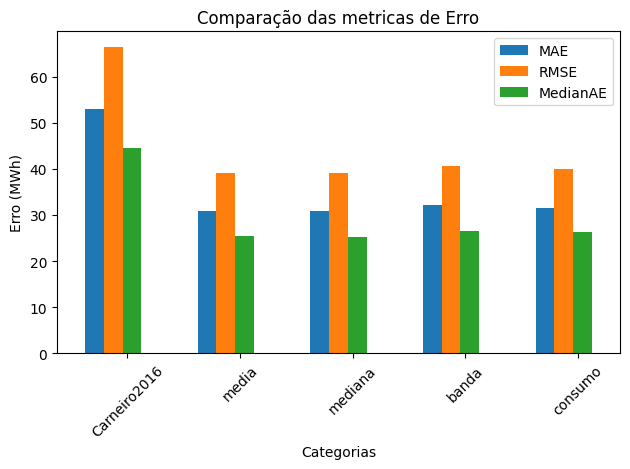

In [65]:

# Transpose the DataFrame
transposed_error_pd = error_pd

# Create a figure and axis object
fig, ax = plt.subplots()

# Set the width of the bars
bar_width = 0.25

# Set the colors for the bars
colors = ['b', 'g', 'r']

# Iterate through the metrics and plot each as a separate bar
#for i, (metric, color) in enumerate(zip(transposed_error_pd.columns, colors)):
 #   ax.bar(transposed_error_pd.index, transposed_error_pd[metric], bar_width, label=metric, color=color)

transposed_error_pd.plot.bar(ax=ax)

# Annotate the values on top of the bars
#for i, (metric, color) in enumerate(zip(transposed_error_pd.columns, colors)):
#    for j, value in enumerate(transposed_error_pd[metric]):
#        ax.text(j + bar_width / 2, round(value,2), str(round(value,2)), #ha='center', va='bottom', 
#                color=color)


# Set the x-tick labels
ax.set_xticks([i + bar_width / 2 for i in range(len(transposed_error_pd))])
ax.set_xticklabels([f.split("_")[-2] for f in transposed_error_pd.index], rotation=45)

# Customize the appearance of the plot
plot_name='Comparação das metricas de Erro'
plt.title(plot_name)
plt.xlabel('Categorias')
plt.ylabel('Erro (MWh)')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

figure_name_path = os.path.join(folder_figures, f"{"_".join(plot_name.lower().split(" "))}.png")
fig.savefig(figure_name_path, bbox_inches='tight')


In [66]:
data

,DATA,HORA,BANDA_SUBIR,BANDA_DESCER,Consumo real,Consumo Máximo ENTSO-E,Consumo máximo Portugal= ENTSOE/p(hora),year,month,day,...,BANDA_RESERVA_p_proposto_media_ponderada_banda_descer,BANDA_SUBIR_p_proposto_media_ponderada_banda_descer,BANDA_DESCER_p_proposto_media_ponderada_banda_descer,BANDA_SUBIR_Carneiro2016,BANDA_DESCER_Carneiro2016,BANDA_RESERVA_Carneiro2016_erro,BANDA_RESERVA_p_proposto_media_erro,BANDA_RESERVA_p_proposto_mediana_erro,BANDA_RESERVA_p_proposto_media_ponderada_banda_erro,BANDA_RESERVA_p_proposto_media_ponderada_consumo_erro
0,2010-01-01,1,190.0,95.0,5953.826,9310.000,NaN,2010,1,1,...,308.277149,205.518100,102.759050,205.518100,102.759050,-23.277149,-31.111469,-29.490892,-23.277149,-23.277149
1,2010-01-01,2,185.0,92.0,5419.243,8972.500,NaN,2010,1,1,...,293.094370,195.396247,97.698123,195.396247,97.698123,-16.094370,-10.577813,-9.620351,-16.094370,-16.094370
2,2010-01-01,3,178.0,89.0,5051.821,8508.400,NaN,2010,1,1,...,255.328228,170.218819,85.109409,170.218819,85.109409,38.693654,13.780951,15.203704,11.671772,11.671772
3,2010-01-01,4,112.0,56.0,4838.914,4614.400,NaN,2010,1,1,...,222.750204,148.500136,74.250068,148.500136,74.250068,-28.125189,-42.038588,-45.212184,-54.750204,-28.125189
4,2010-01-01,5,107.0,54.0,4712.141,4354.900,NaN,2010,1,1,...,193.016301,128.677534,64.338767,128.677534,64.338767,-5.630432,-35.068589,-35.699246,-32.016301,-32.016301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78883,2018-12-31,20,184.5,92.3,6382.619,8939.025,NaN,2018,12,31,...,320.101102,213.400735,106.700367,213.400735,106.700367,15.461535,-40.039075,-39.834322,-43.301102,-43.301102
78884,2018-12-31,21,182.5,91.3,6396.562,8805.625,NaN,2018,12,31,...,291.075555,194.050370,97.025185,194.050370,97.025185,70.939556,-13.134250,-11.459023,-17.275555,-17.275555
78885,2018-12-31,22,172.5,86.3,6316.375,8150.625,NaN,2018,12,31,...,289.025554,192.683703,96.341851,192.683703,96.341851,57.579556,-26.742794,-24.024929,-30.225554,-30.225554
78886,2018-12-31,23,160.5,80.3,6400.275,7391.025,NaN,2018,12,31,...,291.170248,194.113499,97.056749,194.113499,97.056749,37.863802,-46.808515,-42.844574,-50.370248,-50.370248


In [68]:

error_table = {}

ps_to_use=["Carneiro2016",
    "p_proposto_media",
    "p_proposto_mediana",
    "p_proposto_media_ponderada_banda",
    "p_proposto_media_ponderada_consumo",#*new_cols
          ]

for p_to_use in ps_to_use:
    name_banda_reserva = f"BANDA_RESERVA_{p_to_use}"
    name_banda_reserva_erro = f"BANDA_RESERVA_{p_to_use}_erro"
    name_banda_reserva_erro_mape = f"BANDA_RESERVA_{p_to_use}_mape"

    data[name_banda_reserva_erro] = data["BANDA_RESERVA"]-data[name_banda_reserva]
    data[name_banda_reserva_erro_mape] = (data[name_banda_reserva_erro]/data["BANDA_RESERVA"])*100
    
    rmse = np.sqrt(np.mean(data[name_banda_reserva_erro]**2))
    error_table[name_banda_reserva_erro] = {
        "MAE":data[name_banda_reserva_erro].abs().mean(),
        "RMSE":rmse,
        "MedianAE":data[name_banda_reserva_erro].abs().median(),
        "MAPE":data[name_banda_reserva_erro_mape].abs().mean()
    }


/tmp/ipykernel_11633/2199754839.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name_banda_reserva_erro] = data["BANDA_RESERVA"]-data[name_banda_reserva]
/tmp/ipykernel_11633/2199754839.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name_banda_reserva_erro_mape] = (data[name_banda_reserva_erro]/data["BANDA_RESERVA"])*100
/tmp/ipykernel_11633/2199754839.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [74]:
error_pd = pd.DataFrame(error_table).T
error_pd["Normalização"] = ["Carneiro2016", "média", "mediana", "média ponderada banda", "média ponderada consumo"]

In [77]:
error_pd.round(2).set_index("Normalização")

,MAE,RMSE,MedianAE,MAPE
Normalização,,,,
Carneiro2016,53.07,66.54,44.53,18.70
média,30.94,39.19,25.38,11.58
mediana,30.85,39.20,25.17,11.51
média ponderada banda,32.15,40.61,26.45,12.19
média ponderada consumo,31.54,39.91,26.20,11.73


In [78]:
error_pd.round(2).set_index("Normalização").to_latex("tabela_estudo_1_medias.tex", escape=False, #index=False, 
                               float_format="%.2f")

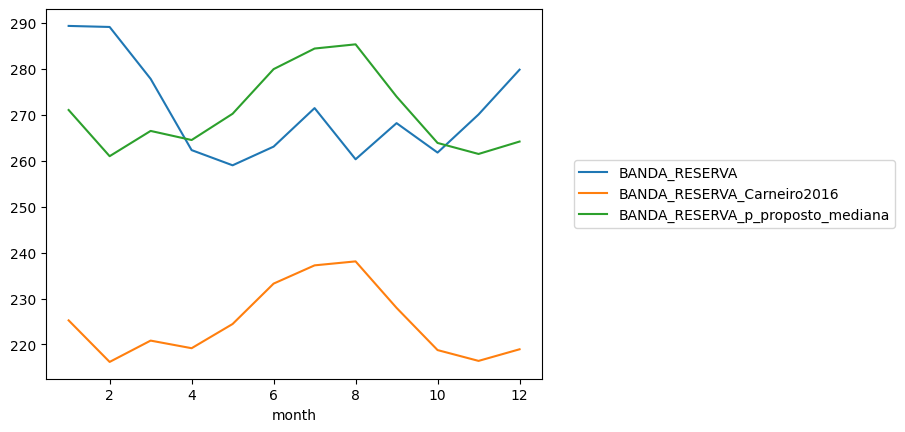

In [79]:
group_col = "month"

data.groupby(group_col)["BANDA_RESERVA"].mean().plot()
ps_to_use=["Carneiro2016",
    "p_proposto_mediana",
          ]

for p_to_use in ps_to_use:
    name_banda_reserva = f"BANDA_RESERVA_{p_to_use}"
    data.groupby(group_col)[name_banda_reserva].mean().plot()
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')



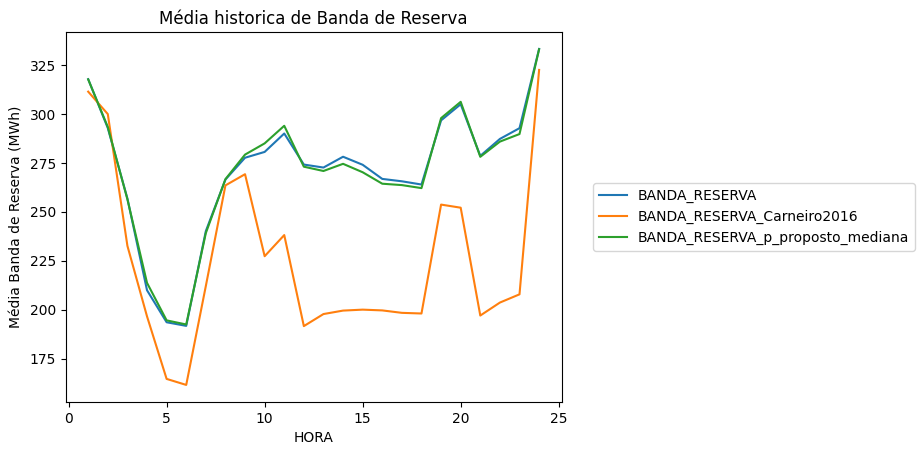

In [82]:
group_col = "HORA"
fig, ax = plt.subplots()
data.groupby(group_col)["BANDA_RESERVA"].mean().plot()
ps_to_use=["Carneiro2016",
    "p_proposto_mediana",#*new_cols
          ]

for p_to_use in ps_to_use:
    name_banda_reserva = f"BANDA_RESERVA_{p_to_use}"
    data.groupby(group_col)[name_banda_reserva].mean().plot()
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

plot_name='Média historica de Banda de Reserva'
plt.title(plot_name)
plt.ylabel('Média Banda de Reserva (MWh)')

figure_name_path = os.path.join(folder_figures, f"{"_".join(plot_name.lower().split(" "))}.png")
fig.savefig(figure_name_path, bbox_inches='tight')


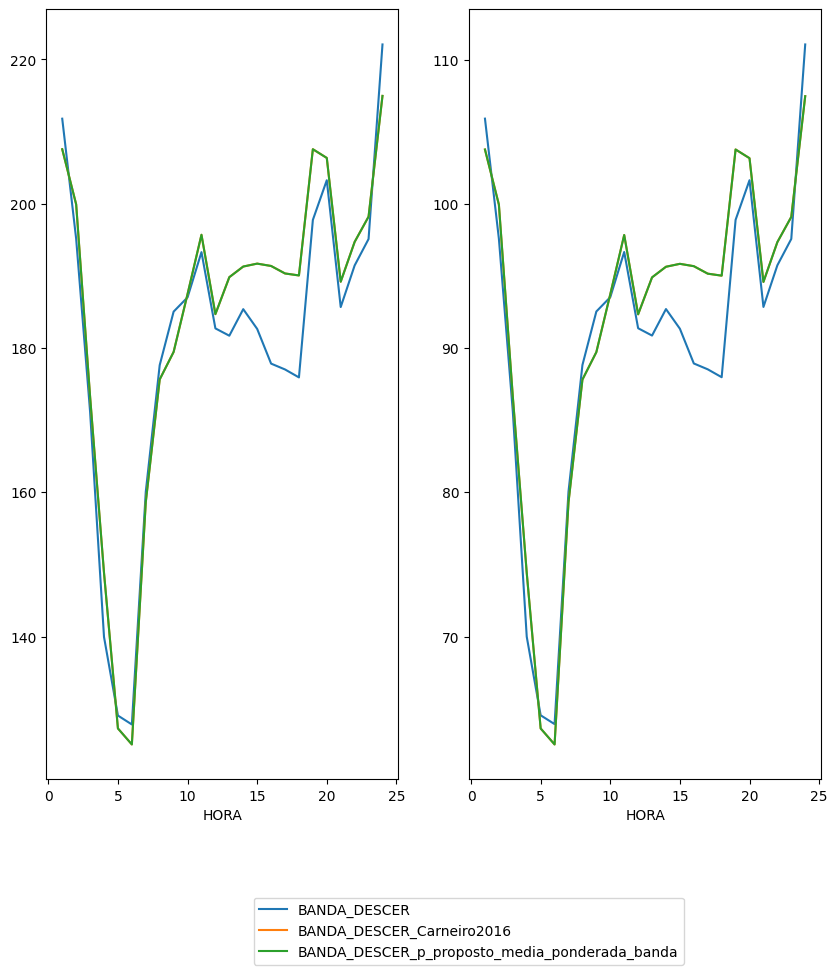

In [83]:
group_col = "HORA"

fig, axs = plt.subplots(1, 2, figsize=(10, 10)
                       )  # Adjust figure size as needed
axs = np.ravel(axs)

ps_to_use=["Carneiro2016",
    "p_proposto_media_ponderada_banda",]


data.groupby(group_col)["BANDA_SUBIR"].mean().plot(ax=axs[0])
data.groupby(group_col)["BANDA_DESCER"].mean().plot(ax=axs[1])

for p_to_use in ps_to_use:
    name_banda_reserva = f"BANDA_RESERVA_{p_to_use}"
    name_banda_reserva_subir = f"BANDA_SUBIR_{p_to_use}"
    data.groupby(group_col)[name_banda_reserva_subir].mean().plot(ax=axs[0])



    name_banda_reserva_descer = f"BANDA_DESCER_{p_to_use}"
    data.groupby(group_col)[name_banda_reserva_descer].mean().plot(ax=axs[1])

plt.legend(bbox_to_anchor=(0, -0.25), 
           loc='lower center')


NameError: name 'new_cols' is not defined

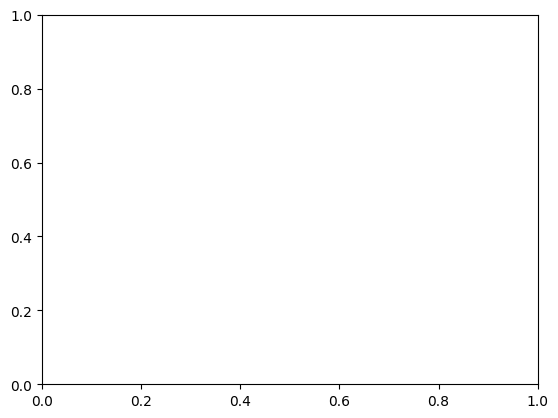

In [84]:
group_col = "HORA"
fig, ax = plt.subplots()

ps_to_use=[#"Carneiro2016",
    "p_proposto_mediana",*new_cols]

for p_to_use in ps_to_use:
    name_banda_reserva_erro_mape = f"BANDA_RESERVA_{p_to_use}_mape"
    data.groupby(group_col)[name_banda_reserva_erro_mape].mean().plot()
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

ax.axhline(y=-5, color='grey', linestyle='--')
ax.axhline(y=5, color='grey', linestyle='--')
#ax.axhline(y=10, color='grey', linestyle='--')
plot_name='Erro médio por hora Banda de Reserva (Arredondamento)'
plt.title(plot_name)
plt.ylabel('Erro (%)')
plt.grid()

#fig.savefig(f"{plot_name}.png",bbox_inches='tight')

In [87]:
pd.DataFrame([data.groupby(group_col)[name_banda_reserva_erro_mape].mean().to_dict()]).T

,0
1,1.320809
2,-3.005632
3,-1.927225
4,4.911150
5,0.317503
6,1.113349
7,0.298089
8,0.462789
9,1.937799
10,-2.175492


In [88]:
data

,DATA,HORA,BANDA_SUBIR,BANDA_DESCER,Consumo real,Consumo Máximo ENTSO-E,Consumo máximo Portugal= ENTSOE/p(hora),year,month,day,...,BANDA_RESERVA_Carneiro2016_erro,BANDA_RESERVA_p_proposto_media_erro,BANDA_RESERVA_p_proposto_mediana_erro,BANDA_RESERVA_p_proposto_media_ponderada_banda_erro,BANDA_RESERVA_p_proposto_media_ponderada_consumo_erro,BANDA_RESERVA_Carneiro2016_mape,BANDA_RESERVA_p_proposto_media_mape,BANDA_RESERVA_p_proposto_mediana_mape,BANDA_RESERVA_p_proposto_media_ponderada_banda_mape,BANDA_RESERVA_p_proposto_media_ponderada_consumo_mape
0,2010-01-01,1,190.0,95.0,5953.826,9310.000,NaN,2010,1,1,...,-23.277149,-31.111469,-29.490892,-23.277149,-23.277149,-8.167421,-10.916305,-10.347681,-8.167421,-8.167421
1,2010-01-01,2,185.0,92.0,5419.243,8972.500,NaN,2010,1,1,...,-16.094370,-10.577813,-9.620351,-16.094370,-16.094370,-5.810242,-3.818705,-3.473051,-5.810242,-5.810242
2,2010-01-01,3,178.0,89.0,5051.821,8508.400,NaN,2010,1,1,...,38.693654,13.780951,15.203704,11.671772,11.671772,14.492005,5.161405,5.694271,4.371450,4.371450
3,2010-01-01,4,112.0,56.0,4838.914,4614.400,NaN,2010,1,1,...,-28.125189,-42.038588,-45.212184,-54.750204,-28.125189,-16.741184,-25.022969,-26.912014,-32.589407,-16.741184
4,2010-01-01,5,107.0,54.0,4712.141,4354.900,NaN,2010,1,1,...,-5.630432,-35.068589,-35.699246,-32.016301,-32.016301,-3.497163,-21.781732,-22.173445,-19.885901,-19.885901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78883,2018-12-31,20,184.5,92.3,6382.619,8939.025,NaN,2018,12,31,...,15.461535,-40.039075,-39.834322,-43.301102,-43.301102,5.585815,-14.464984,-14.391012,-15.643462,-15.643462
78884,2018-12-31,21,182.5,91.3,6396.562,8805.625,NaN,2018,12,31,...,70.939556,-13.134250,-11.459023,-17.275555,-17.275555,25.909261,-4.797023,-4.185180,-6.309553,-6.309553
78885,2018-12-31,22,172.5,86.3,6316.375,8150.625,NaN,2018,12,31,...,57.579556,-26.742794,-24.024929,-30.225554,-30.225554,22.248669,-10.333383,-9.283203,-11.679117,-11.679117
78886,2018-12-31,23,160.5,80.3,6400.275,7391.025,NaN,2018,12,31,...,37.863802,-46.808515,-42.844574,-50.370248,-50.370248,15.724170,-19.438752,-17.792597,-20.917877,-20.917877


In [94]:
table_p_proposto = pd.DataFrame([data.groupby("HORA")["p_proposto_mediana"].mean().to_dict()]).T
table_p_proposto["Hora"] = table_p_proposto.index
table_p_proposto["ρ"] = table_p_proposto[0]
table_p_proposto =table_p_proposto[["Hora", "ρ"]]

In [97]:
table_name_path = os.path.join(folder_table, "table_p_proposto.tex")


table_p_proposto.to_latex(table_name_path, escape=False, index=False, 
                               #float_format="%.2f"
                                                )

In [124]:
col_p_name = "p_proposto_mediana"

new_cols = []
for i in range(1, 6):
    print(i)
    col_new_p_round =f"{col_p_name}_round_{i}"
    data[col_new_p_round] = data[col_p_name].round(i)
    new_cols.append(col_new_p_round)

1
2
3
4
5


/tmp/ipykernel_3388/2280342195.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col_new_p_round] = data[col_p_name].round(i)
/tmp/ipykernel_3388/2280342195.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col_new_p_round] = data[col_p_name].round(i)
/tmp/ipykernel_3388/2280342195.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [125]:
new_cols

['p_proposto_mediana_round_1',
 'p_proposto_mediana_round_2',
 'p_proposto_mediana_round_3',
 'p_proposto_mediana_round_4',
 'p_proposto_mediana_round_5']

In [242]:
# Normalizar parametro p em função do erro da banda calculada com o mesmo

## media
## mediana

#### Perguntas:
# Qual a medida de erro a usar? (mse, me, rmse...?)
# Podemos estudar este passo com alguma ML? para ja nao!

# mais tarde fazer este passo om ML (timesries analyisis)


def get_beta_hora(data_test, agg_method=[]):
    kwargs = {}
    if isinstance(agg_method, dict):
        return weighted_group_average(data_test, group_col =agg_method["group_col"],
                                      value_col = agg_method["value_col"],
                                      weights_col = agg_method["weights_col"])
    if len(agg_method)>1:
        if isinstance(agg_method[1], dict):
            kwargs = agg_method[1]
    return round(data_test.groupby("HORA")[nome_tese_joao].agg(agg_method[0], **kwargs), 1)


def get_band_error(truth, predicted, err_func:callable):
    # test all sklearn regression metrics
    
    return err_func(predicted, truth)

def normalize_p_with_band_error(data_test, a=10, b=150, err_func=None, agg_method=[np.mean]):
    beta_hora = get_beta_hora(data_test, agg_method=agg_method)
    data_test[nome_tese_joao_norm] = data_test["HORA"].map(beta_hora)
    data_test["Banda_Subir_calculado"] =( data_test[nome_tese_joao_norm] * np.sqrt((a*data_test["Consumo real"]) + (b*b) ) ) - b
    erro = get_band_error(data_test["Banda_Subir_calculado"], data_test["BANDA_SUBIR"], err_func)
    return erro

In [243]:
sklearn_regression_metrics_units = [#"explained_variance_score",
                             "max_error",
                             "mean_absolute_error",
                              "mean_squared_error",
                              #"mean_squared_log_error",
                              "median_absolute_error",
                              #"r2_score",
                              #"mean_poisson_deviance",
                              #"mean_gamma_deviance",
                              #"mean_tweedie_deviance",
                              #"d2_tweedie_score",
                              #"mean_pinball_loss",
                              #"d2_pinball_score",
                              #"d2_absolute_error_score"
                             ]


sklearn_regression_metrics_percentages = ["mean_absolute_percentage_error",
                                          
]
# make rmse

In [244]:


p_agg_methods = {"mean":[np.mean],
                "median": [np.median],
                "weighted_average":{"group_col" :"HORA",
"value_col" :nome_tese_joao,
"weights_col" :"BANDA_SUBIR"}}

In [245]:
from sklearn import metrics
error_per_p_agg = {}

for p_agg in p_agg_methods:
    agg_method = p_agg_methods[p_agg]
    error_per_metrics = {}
    for err in sklearn_regression_metrics_units:
        err_func = getattr(metrics, err)
        e = normalize_p_with_band_error(data, a=10, b=150, err_func=err_func, agg_method=agg_method)
        if "squared" in err:
            err = f"root_{err}"
            e = np.sqrt(e)
        error_per_metrics[err] = e
    error_per_p_agg[p_agg] = error_per_metrics

/tmp/ipykernel_40329/175913385.py:22: FutureWarning: The provided callable <function mean at 0x7d272e3e7380> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return round(data_test.groupby("HORA")[nome_tese_joao].agg(agg_method[0], **kwargs), 1)
/tmp/ipykernel_40329/175913385.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[nome_tese_joao_norm] = data_test["HORA"].map(beta_hora)
/tmp/ipykernel_40329/175913385.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [246]:
error_per_metrics

{'max_error': 112.99967982474124,
 'mean_absolute_error': 23.39156286842974,
 'root_mean_squared_error': 29.577965456852993,
 'median_absolute_error': 19.28879320833454}

In [247]:
error_per_p_agg

{'mean': {'max_error': 112.99967982474124,
  'mean_absolute_error': 23.032531037809427,
  'root_mean_squared_error': 29.155739863056098,
  'median_absolute_error': 19.048990594887584},
 'median': {'max_error': 112.99967982474124,
  'mean_absolute_error': 22.956053049499197,
  'root_mean_squared_error': 29.140517952650267,
  'median_absolute_error': 18.939649122951863},
 'weighted_average': {'max_error': 112.99967982474124,
  'mean_absolute_error': 23.39156286842974,
  'root_mean_squared_error': 29.577965456852993,
  'median_absolute_error': 19.28879320833454}}

In [248]:
min_error = 1000000000
min_error_path=[None,None]

for k in error_per_p_agg:
    for p in error_per_p_agg[k]:
        e = error_per_p_agg[k][p]
        if e < min_error:
            min_error=e
            min_error_path = [k, p]

In [249]:
min_error_path

['median', 'median_absolute_error']

In [250]:
min_error

18.939649122951863

In [251]:
nome_tese_joao_norm

'Curent study norm.'

In [252]:
beta_hora = get_beta_hora(data, agg_method=p_agg_methods['median'])

data[nome_tese_joao_norm] = data["HORA"].map(beta_hora)
data[nome_tese_joao_banda] =( data[nome_tese_joao_norm] * np.sqrt((a*data["Consumo real"]) + (b*b) ) ) - b
data[nome_tese_celia_banda] =( data[nome_tese_celia] * np.sqrt((a*data["Consumo real"]) + (b*b) ) ) - b 


/tmp/ipykernel_40329/175913385.py:22: FutureWarning: The provided callable <function median at 0x7d272cf1ff60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  return round(data_test.groupby("HORA")[nome_tese_joao].agg(agg_method[0], **kwargs), 1)
/tmp/ipykernel_40329/1819191038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[nome_tese_joao_norm] = data["HORA"].map(beta_hora)
/tmp/ipykernel_40329/1819191038.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

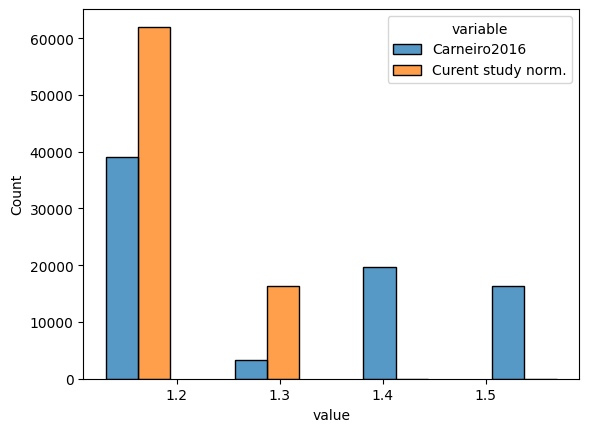

In [39]:
p_calculado_bins = len(np.unique(data[nome_tese_joao_norm].round(1)))
p_delia_bins = len(np.unique(data[nome_tese_celia]))

sns.histplot(data[[nome_tese_celia, nome_tese_joao_norm]].melt(), x='value', hue='variable',
             multiple='dodge', shrink=0.5, bins=max(p_delia_bins,p_calculado_bins));

In [40]:
nome_tese_joao
nome_tese_celia_banda

'Carneiro2016 Banda Subir'

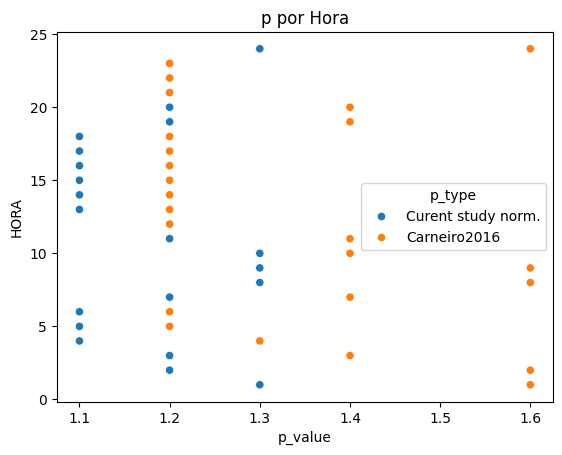

In [41]:

p_calc = data.groupby("HORA")[nome_tese_joao_norm].median()

p_set2 = pd.DataFrame(p_calc.reset_index())
p_set2["p_value"] = p_set2["HORA"].map(map_p_delia)
p_set2["p_type"] = nome_tese_celia
p_set2.drop(nome_tese_joao_norm,axis=1, inplace=True)


p_set = pd.DataFrame(p_calc.reset_index())
p_set["p_value"] = p_set[nome_tese_joao_norm]
p_set.drop(nome_tese_joao_norm,axis=1, inplace=True)
p_set["p_type"] = nome_tese_joao_norm


p_set = pd.concat([p_set, p_set2])
p_set.reset_index(inplace=True)


plot_name = 'p por Hora'

sns_plot = sns.scatterplot(data=p_set, x="p_value", y="HORA", hue="p_type")
sns_plot.set(title=plot_name)
sns_plot.figure.savefig(f"{plot_name} norm.png")


<Axes: xlabel='month'>

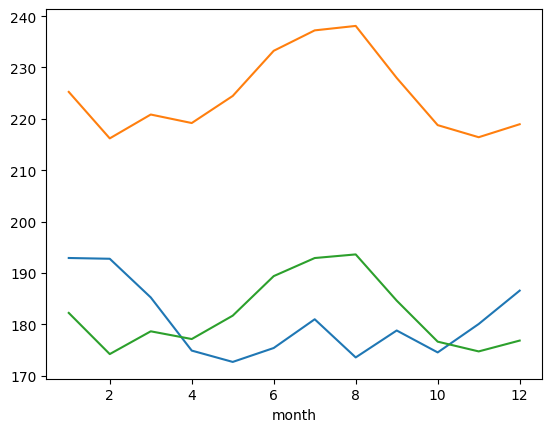

In [42]:
group_col = "month"

data.groupby(group_col)["BANDA_SUBIR"].mean().plot()
data.groupby(group_col)[nome_tese_celia_banda].mean().plot()
data.groupby(group_col)[nome_tese_joao_banda].mean().plot()

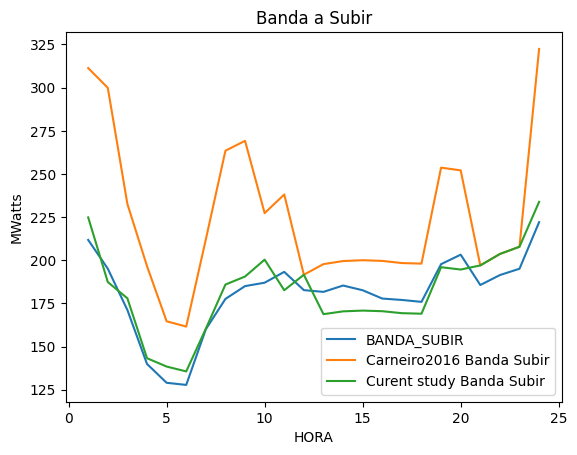

In [43]:
group_col = "HORA"
plt.figure()
data.groupby(group_col)["BANDA_SUBIR"].mean().plot()
data.groupby(group_col)[nome_tese_celia_banda].mean().plot()
data.groupby(group_col)[nome_tese_joao_banda].mean().plot()
plt.legend()
plot_name = 'Banda a Subir'
plt.ylabel('MWatts')
plt.title(plot_name)
plt.savefig(f"{plot_name}.png")

plt.show()



In [44]:
# Ver sem absoluto

data[nome_tese_joao_erro_percentual] = (data["BANDA_SUBIR"] - data[nome_tese_joao_banda]) / data["BANDA_SUBIR"]
data[nome_tese_celia_erro_percentual] = (data["BANDA_SUBIR"] - data[nome_tese_celia_banda]) / data["BANDA_SUBIR"]

data[nome_tese_joao_erro_percentual] =data[nome_tese_joao_erro_percentual] *100
data[nome_tese_celia_erro_percentual] =data[nome_tese_celia_erro_percentual] *100

/tmp/ipykernel_38722/688917483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[nome_tese_joao_erro_percentual] = (data["BANDA_SUBIR"] - data[nome_tese_joao_banda]) / data["BANDA_SUBIR"]
/tmp/ipykernel_38722/688917483.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[nome_tese_celia_erro_percentual] = (data["BANDA_SUBIR"] - data[nome_tese_celia_banda]) / data["BANDA_SUBIR"]
/tmp/ipykernel_38722/688917483.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [45]:
sum(abs(data[nome_tese_joao_erro_percentual]) > 5) / len(data)

0.7485248665355437

In [46]:
sum(abs(data[nome_tese_celia_erro_percentual]) > 5) / len(data)

0.8982221768116683

In [47]:
sum(abs(data[nome_tese_joao_erro_percentual]) < 10) / len(data)

0.4756443331885872

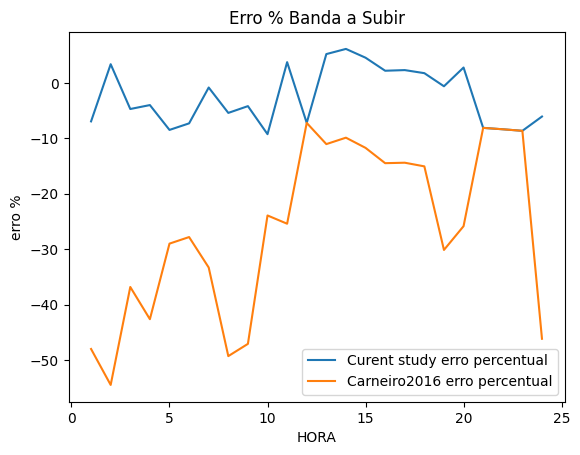

In [48]:

plt.figure()

data.groupby("HORA").mean()[nome_tese_joao_erro_percentual].plot()
data.groupby("HORA").mean()[nome_tese_celia_erro_percentual].plot()
plt.legend()

plot_name = 'Erro % Banda a Subir'

plt.title(plot_name)
plt.ylabel('erro %')
plt.savefig(f"{plot_name}.png")
plt.show()



In [49]:
# Com esta banda conseguimos garantir o fornecimento na reserva secundaria

In [50]:
data["erro_banda_subir_calculado_percentual"].hist(bins=1000)

KeyError: 'erro_banda_subir_calculado_percentual'

In [ ]:
data.groupby("HORA").max()["erro_banda_subir_calculado_percentual"].plot()
data.groupby("HORA").min()["erro_banda_subir_calculado_percentual"].plot()


In [ ]:
data[abs(data["erro_banda_subir_calculado_percentual"]) > 0.05].groupby("HORA").mean()["erro_banda_subir_calculado_percentual"].plot()

In [ ]:
data.to_csv("Secondary_treated.csv")

In [ ]:
data

In [1]:
a = np.arange(-20, 20)

NameError: name 'np' is not defined